# Explore here

In [10]:
import pandas as pd

total_data =  pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
total_data.shape

(48895, 16)

In [12]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Existen un total de 48.895 filas (en este caso, direcciones de Airbnb en NY) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, Price.


Las variables last_review y reviews_per_month contienen más de 10K valores nulos (de los 48.895 comentados previamente).
Las variables hsot_name y name también cuentan con valores nulos, pero ambos, menos de 20. El resto de variables cuentan siempre con valor.

Los datos cuentan con 10 características numéricas y 6 características categóricas.

In [13]:
total_data.drop("id", axis = 1).duplicated().sum()

np.int64(0)

No hemos encontrado duplicados en las columna que tomaremos como base para el EDA, que es la columna "id", por lo que no utilizaremos la opcion drop duplicates en esta ocasión.

In [ ]:
total_data.drop(["id", "name", "host_id", "host_name"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


ANÁLISIS DE VARIABLES UNIVARIANTE

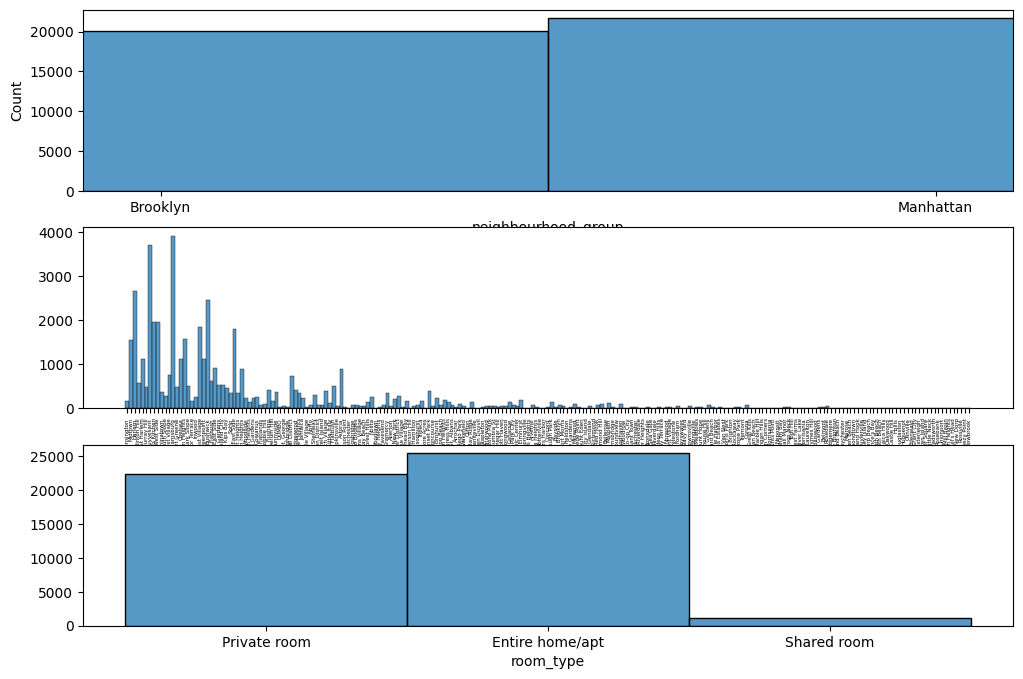

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns


# CATEGÓRICAS 


fig, axis = plt.subplots(3, figsize=(12, 8))

# Create a multiple histogram
sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[1], data = total_data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = total_data, x = "room_type").set(ylabel = None)

axis[1].tick_params(axis='x', rotation=90, labelsize=4)
plt.show()



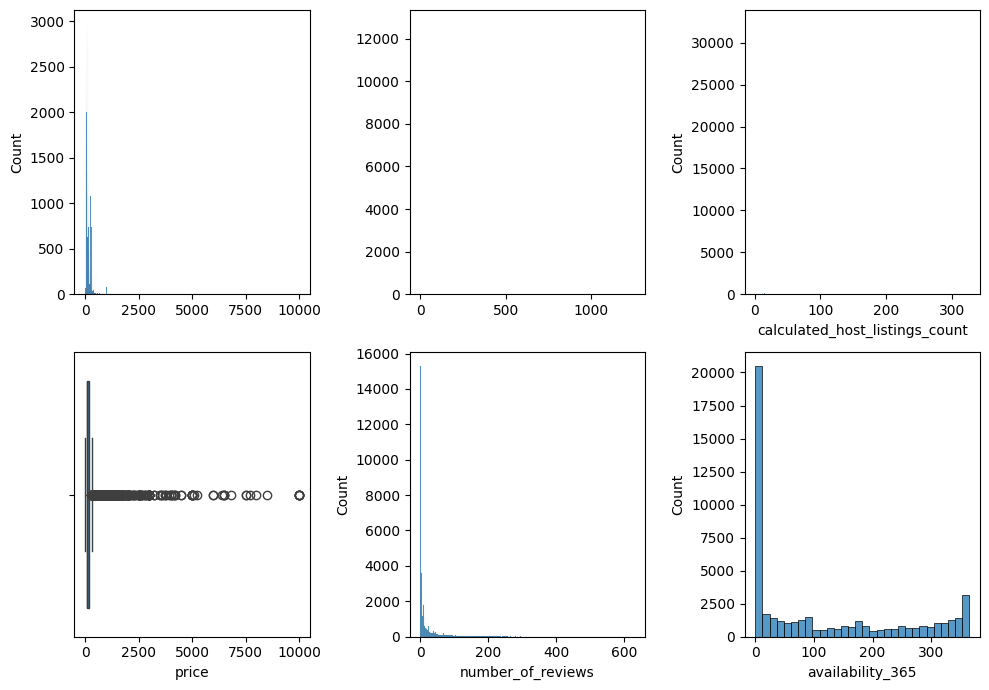

In [32]:
# NUMÉRICAS


fig, axis = plt.subplots(2, 3, figsize = (10, 7), gridspec_kw={'height_ratios': [3, 3]})



sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlabel = None)
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.histplot(ax = axis[0,2], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[1,1], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[1,2], data = total_data, x = "availability_365")

plt.tight_layout()
plt.show()
